## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Loading Dataset:

In [3]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Types of Features:**
- **Categorical** - Sex and Embarked
- **Continuous** -Age, Fare
- **Discrete** - SibSp, Parch
- **AlphaNumeric** - Cabin

## Note:
- **sibsp** - Number of Siblings/Spouses Aboard. 
- **parch** - Number of Parents/Children Aboard.

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Numerical Value Analysis:

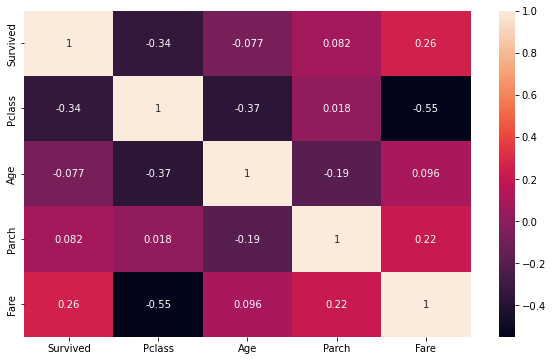

In [8]:
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data[['Survived','Pclass','Age','Parch','Fare']].corr(), annot= True)

## Insight:
- We can see `Fare` is influencing Survived and by intuition age also should be somehow related to survival as children and women are saved during the incident.

## <font color = 'green'>sibsp - number of siblings/spouses aboard the titanic </font>

In [9]:
# understanding the unique values of sibsp
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

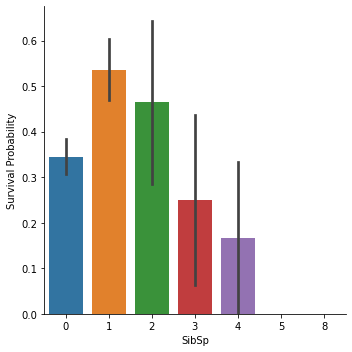

In [10]:
sns.factorplot(x = 'SibSp', y = 'Survived', data = data, kind = 'bar').set_ylabels("Survival Probability")

##### If the siblings/spouse number is either 1 or 0 then survival prob is more than higher SibSP

## <font color = 'green'>Age</font>

<Figure size 576x360 with 0 Axes>

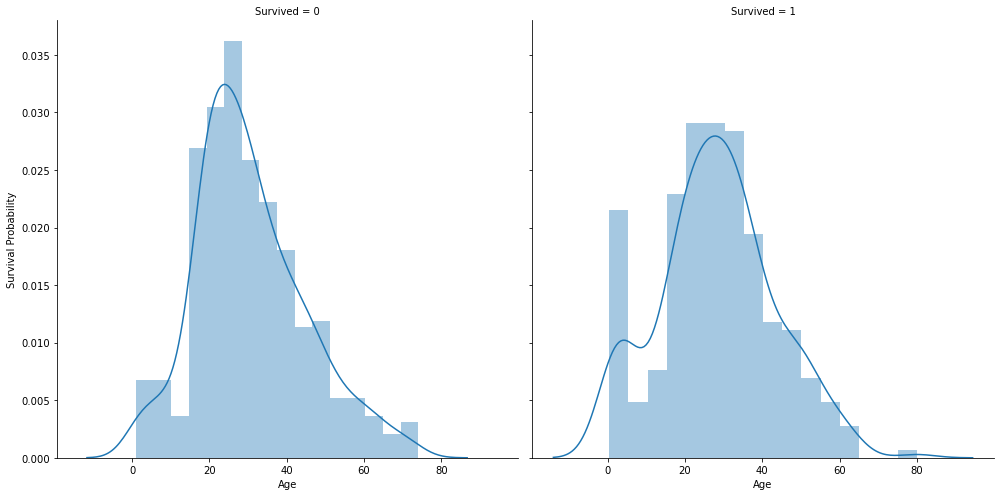

In [11]:
plt.figure(figsize=(8,5))
age_visual = sns.FacetGrid(data, col='Survived', size=7)
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels("Survival Probability");

#### Thus we can conclude for age between 20 to 40 there is chance of survival. So age is also imp feature for survival prediction

## <font color = 'green'>Sex</font>

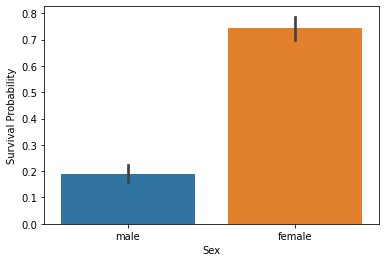

In [12]:
sex_plot = sns.barplot(x = 'Sex', y = 'Survived', data = data).set_ylabel('Survival Probability')

In [13]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Female/male also a key feature for survival

## <font color = 'green'>PClass</font>

- 1: Upper class
- 2: Middel class
- 3: Lower class

<Figure size 432x432 with 0 Axes>

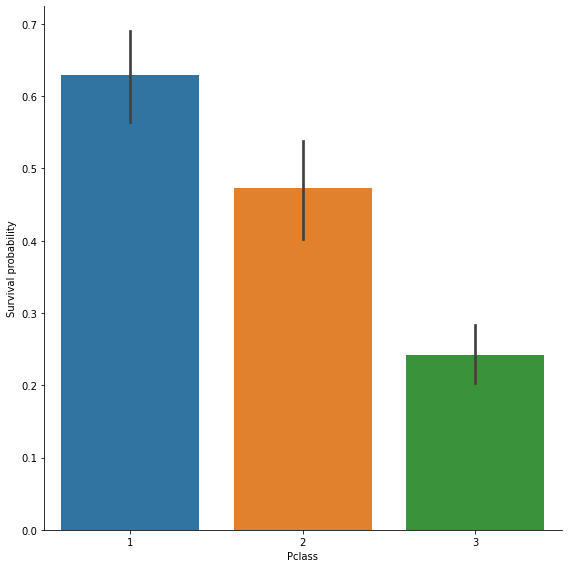

In [14]:
plt.figure(figsize=(6,6))
Pclass = sns.factorplot(x = 'Pclass', y = 'Survived', data = data, kind = 'bar',size = 8)
Pclass = Pclass.set_ylabels('Survival probability')

<Figure size 432x432 with 0 Axes>

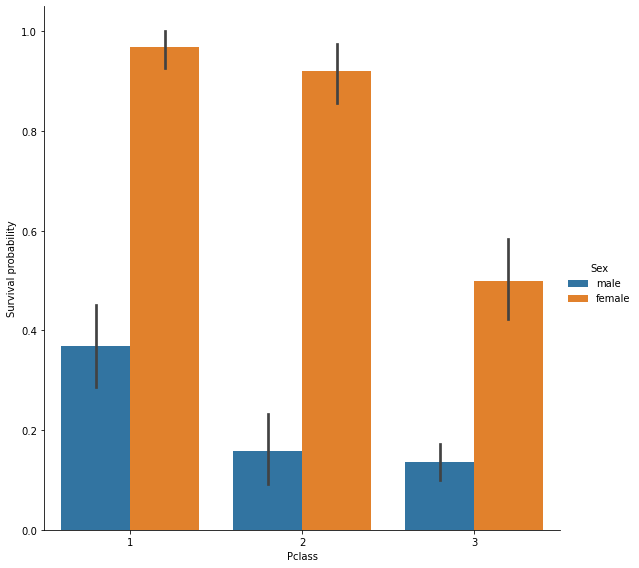

In [15]:
plt.figure(figsize=(6,6))
Pclass = sns.factorplot(x = 'Pclass', y = 'Survived', data = data, kind = 'bar', hue = 'Sex',size = 8)
Pclass = Pclass.set_ylabels('Survival probability')

#### Higher class(class 1,2) have high chances of survival

## <font color = 'green'>Embarked</font>

Survival based on from which station the person has started his/her journey(from Southampton, Cherbourg, and Queenstown)

In [16]:
data['Embarked'].isnull().sum()

2

In [17]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
data['Embarked'] = data['Embarked'].fillna('S') #Southampton has majority values

<Figure size 432x432 with 0 Axes>

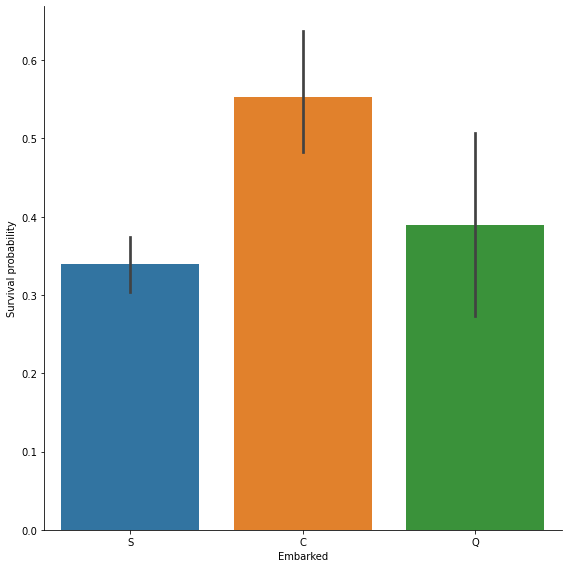

In [19]:
plt.figure(figsize=(6,6))
Pclass = sns.factorplot(x = 'Embarked', y = 'Survived', data = data, kind = 'bar',size = 8)
Pclass = Pclass.set_ylabels('Survival probability')

### Actually Embarked should not effect survival prob but, we can see there is some dependency. 

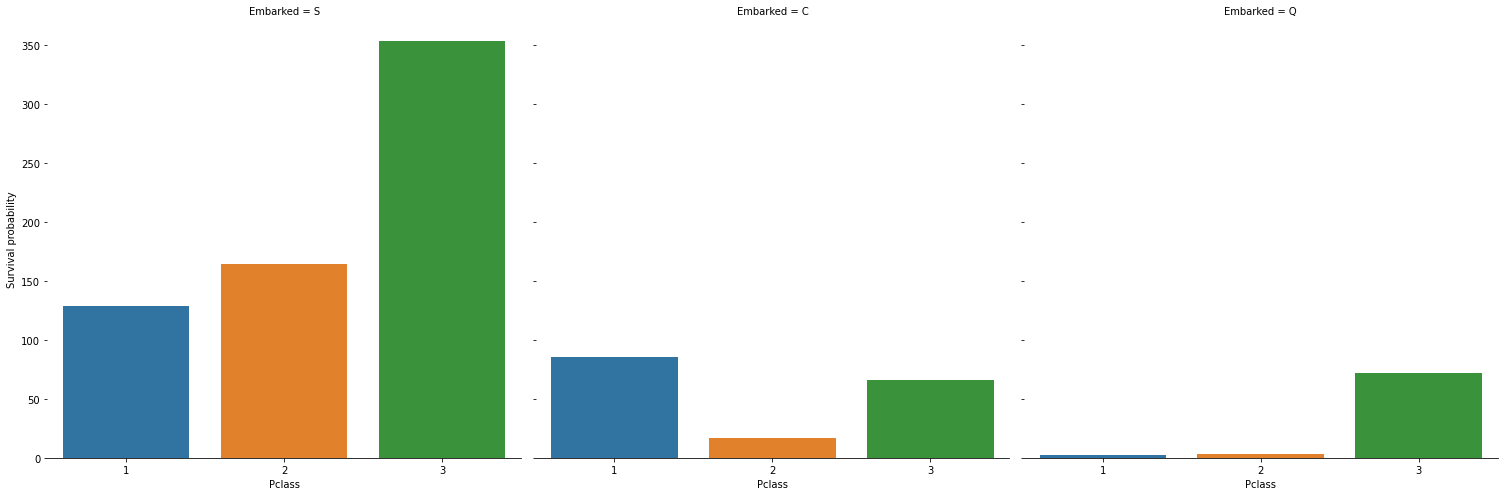

In [20]:
q = sns.factorplot('Pclass', col = 'Embarked', data= data,size =7,  kind = "count")
q.despine(left = True)
q.set_ylabels("Survival probability")

### We can see class 3 people were more from Southampton (S Embarked) so they should less survival probability. So let's compare embarked to sex

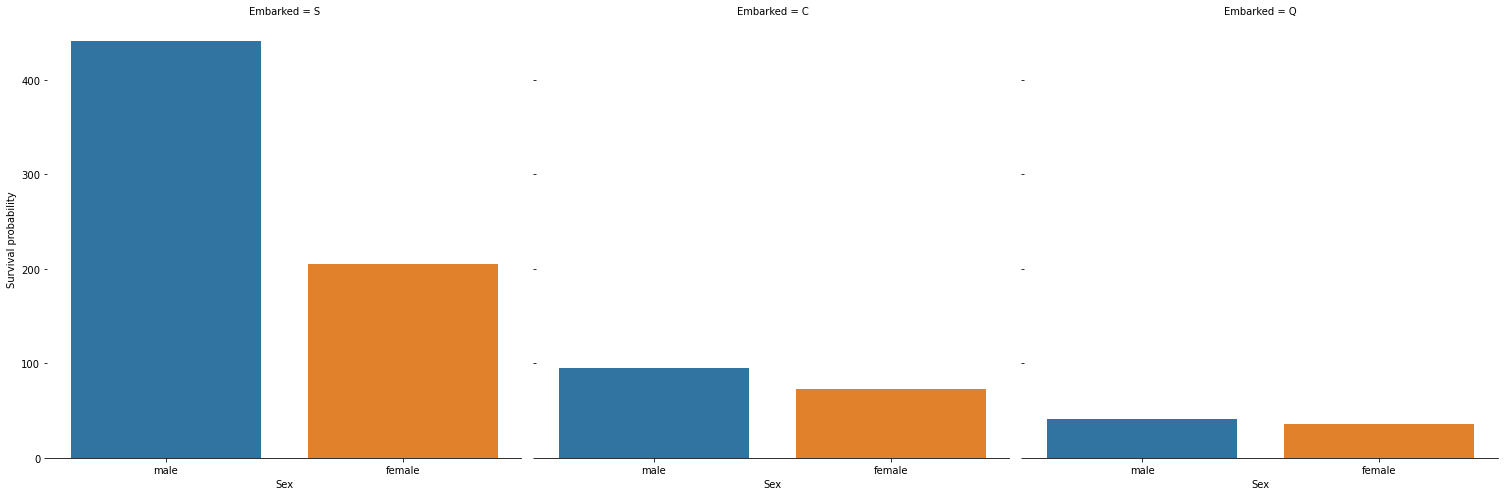

In [21]:
q = sns.factorplot('Sex', col = 'Embarked', data= data,size =7,  kind = "count")
q.despine(left = True)
q.set_ylabels("Survival probability")

### Majority of Southampton passengerss are male so survival prob is less. 


#### <font color = 'ciyan'>So embarked is not an imp feature as it is almost dependent on other features</font>

## Preparing Data

In [22]:
data = pd.read_csv('titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### <font color = 'ciyan'>Age has many null values and also it is imp feature. So we can't randomly fill with avg values</font>

For age distribution we know 64% of data will be from mean-(std deviation),mean+(std deviation).
<font color = 'ciyan'>So let's random values from that range and fill null values</font>

In [24]:
mean = data['Age'].mean()
std = data['Age'].std()
is_null = data['Age'].isnull().sum()

In [25]:
print(mean,std,is_null)

29.69911764705882 14.526497332334044 177


In [26]:
random_age = np.random.randint(mean-std,mean+std,size = is_null)
random_age

array([27, 37, 37, 18, 33, 18, 28, 16, 29, 19, 42, 43, 33, 25, 27, 37, 21,
       22, 39, 25, 35, 25, 17, 30, 15, 32, 25, 35, 20, 20, 23, 37, 24, 36,
       17, 24, 30, 43, 25, 29, 23, 23, 37, 19, 21, 33, 24, 25, 18, 20, 28,
       35, 35, 19, 39, 38, 35, 31, 19, 36, 22, 22, 43, 37, 18, 26, 19, 24,
       20, 28, 24, 30, 32, 43, 34, 27, 32, 28, 20, 18, 36, 34, 32, 39, 40,
       42, 23, 40, 16, 22, 31, 17, 42, 24, 33, 25, 25, 26, 39, 43, 40, 43,
       32, 35, 40, 38, 36, 20, 24, 39, 15, 27, 31, 36, 31, 27, 37, 23, 25,
       15, 15, 37, 26, 22, 27, 22, 34, 29, 34, 15, 28, 31, 37, 31, 43, 37,
       19, 20, 34, 17, 25, 24, 16, 22, 41, 37, 18, 29, 24, 43, 31, 20, 39,
       40, 38, 41, 17, 20, 25, 31, 33, 38, 29, 24, 26, 29, 26, 41, 20, 32,
       24, 19, 35, 40, 20, 18, 36])

In [27]:
dummy_age = data['Age'].copy()

In [28]:
np.isnan(dummy_age)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [29]:
dummy_age[np.isnan(dummy_age)] = random_age

In [30]:
data['Age'] = dummy_age

In [31]:
data['Age'].isnull().sum()

0

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
data['Embarked'] = data['Embarked'].fillna("S")

In [34]:
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data.drop(cols_to_drop, axis = 1, inplace=True)

In [35]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### <font color = 'ciyan'>Changing the categorical features</font>

In [36]:
gender = {'male':0,'female':1}
data['Sex'] = data['Sex'].map(gender)

In [37]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [38]:
start_journey = {'S':0, "C":1,"Q":3}
data['Embarked'] = data['Embarked'].map(start_journey)

### Splitting Data

In [39]:
x = data.drop('Survived', axis = 1)
y = data['Survived']

In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=43)

In [59]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
770,3,0,24.0,0,0,9.5000,0
853,1,1,16.0,0,1,39.4000,0
144,2,0,18.0,0,0,11.5000,0
141,3,1,22.0,0,0,7.7500,0
261,3,0,3.0,4,2,31.3875,0
...,...,...,...,...,...,...,...
715,3,0,19.0,0,0,7.6500,0
834,3,0,18.0,0,0,8.3000,0
558,1,1,39.0,1,1,79.6500,0
453,1,0,49.0,1,0,89.1042,1


## Scaling:

In [60]:
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
x_train = sclr.fit_transform(x_train)
x_test = sclr.transform(x_test)

## Classification

In [61]:
log_reg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [62]:
log_reg.fit(x_train, y_train)
svc_classifier.fit(x_train, y_train)
dt_classifier.fit(x_train, y_train)
knn_classifier.fit(x_train, y_train)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [63]:
log_ypred = log_reg.predict(x_test)
svc_ypred = svc_classifier.predict(x_test)
dt_ypred = dt_classifier.predict(x_test)
knn_ypred= knn_classifier.predict(x_test)
rf_ypred = rf_classifier.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score
log_reg_acc = accuracy_score(y_test, log_ypred)
svc_classifier_acc = accuracy_score(y_test, svc_ypred)
dt_classifier_acc = accuracy_score(y_test, dt_ypred)
knn_classifier_acc = accuracy_score(y_test, knn_ypred)
rf_classifier_acc = accuracy_score(y_test, rf_ypred)

In [65]:
print("Logistic Regression     : ", round(log_reg_acc*100,2))
print("SVC Classifier          : ", round(svc_classifier_acc*100,2))
print("Decision Tree Classifier: ", round(dt_classifier_acc*100,2))
print("K Nearest Neighbour     : ", round(knn_classifier_acc*100,2))
print("Random Forest Classifier: ", round(rf_classifier_acc*100,2))

Logistic Regression     :  74.63
SVC Classifier          :  79.85
Decision Tree Classifier:  70.52
K Nearest Neighbour     :  78.73
Random Forest Classifier:  78.36
